In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
X=df.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

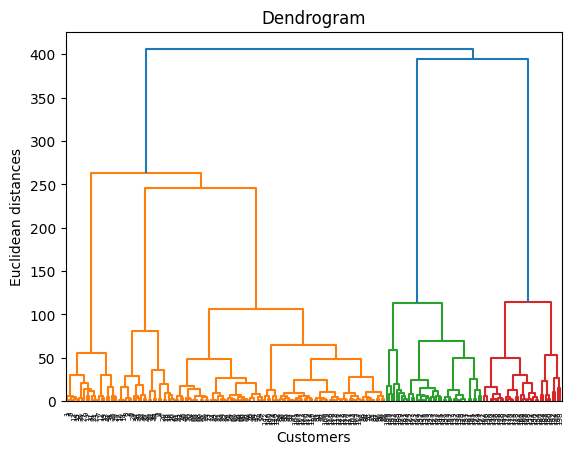

In [30]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [31]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)    
y_hc                                         

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

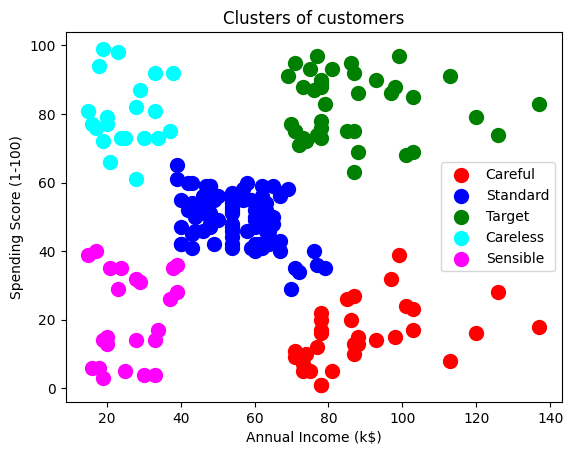

In [32]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label='Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,y_hc)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.553


# Hierarchial clustering on Financial News

In [34]:
# Cell 1: Import Required Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [36]:
# Cell 2: Load Dataset

# Update path if needed
df = pd.read_csv("all-data.csv", 
                 names=["Sentiment", "News Headline"], 
                 encoding="latin-1")

df.head()


,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [37]:
# Cell 3: Check Data Information

print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (4846, 2)

Columns: Index(['Sentiment', 'News Headline'], dtype='object')

Missing values:
 Sentiment        0
News Headline    0
dtype: int64


In [38]:
# Cell 4: Extract Text Column

text_data = df["News Headline"]

# Remove missing values (if any)
text_data = text_data.dropna()

print("Total news headlines:", len(text_data))


Total news headlines: 4846


In [39]:
# Cell 5: Apply TF-IDF Vectorization

tfidf = TfidfVectorizer(
    max_features=1000,      # Limit to top 1000 words
    stop_words='english',   # Remove common English words
    lowercase=True
)

X = tfidf.fit_transform(text_data)

print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (4846, 1000)


In [40]:
# Cell 6: View Top Words Used as Features

feature_names = tfidf.get_feature_names_out()

print("Total Features:", len(feature_names))
print("Sample Features:\n", feature_names[:20])


Total Features: 1000
Sample Features:
 ['00' '000' '10' '100' '11' '12' '13' '14' '15' '150' '16' '17' '18' '19'
 '20' '200' '2004' '2005' '2006' '2007']


In [41]:
# Cell 11: Import Libraries for Hierarchical Clustering

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [42]:
# Cell 12: Take Subset (First 300 Articles)

subset_size = 300
X_subset = X[:subset_size].toarray()   # Convert sparse matrix to dense

print("Subset Shape:", X_subset.shape)


Subset Shape: (300, 1000)


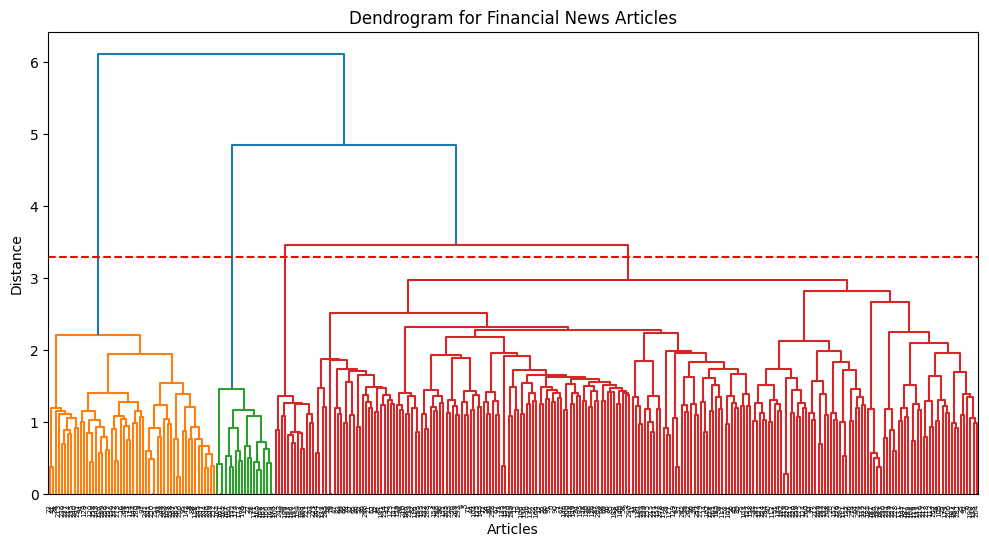

In [47]:
# Cell 13: Create Linkage Matrix

linked = linkage(X_subset, method='ward')

# Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.axhline(y=3.3, color='r', linestyle='--')  # Add horizontal line to indicate clusters
plt.title("Dendrogram for Financial News Articles")
plt.xlabel("Articles")
plt.ylabel("Distance")
plt.show()


In [44]:
# Cell 14: Apply Agglomerative Clustering

n_clusters = 4  # Change based on dendrogram observation

agglo = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward'
)

cluster_labels = agglo.fit_predict(X_subset)

print("Cluster Labels Sample:", cluster_labels[:20])


Cluster Labels Sample: [0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0]


In [45]:
# Cell 15: Calculate Silhouette Score

score = silhouette_score(X_subset, cluster_labels)

print("Silhouette Score:", round(score, 4))


Silhouette Score: 0.0592
